<a href="https://colab.research.google.com/github/Geekrish26/Aerofit-casestudy/blob/main/Aerofit_business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement :-
We wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [ ]:
df = pd.read_csv("aerofit_treadmill.csv")
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Analysing basic metrics

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


It implies data does not have any missing values.

In [ ]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
cat_cols = ['Product', 'Gender', 'MaritalStatus']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Checking for Outliers -

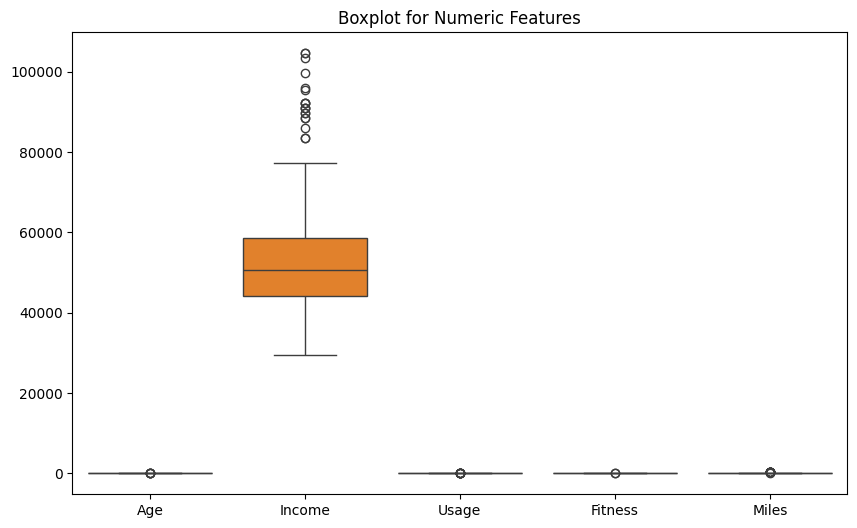

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'Income', 'Usage', 'Fitness', 'Miles']])
plt.title("Boxplot for Numeric Features")
plt.show()

In [ ]:
product_counts = df['Product'].value_counts(normalize=True)*100
product_counts

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


<Axes: ylabel='Age'>

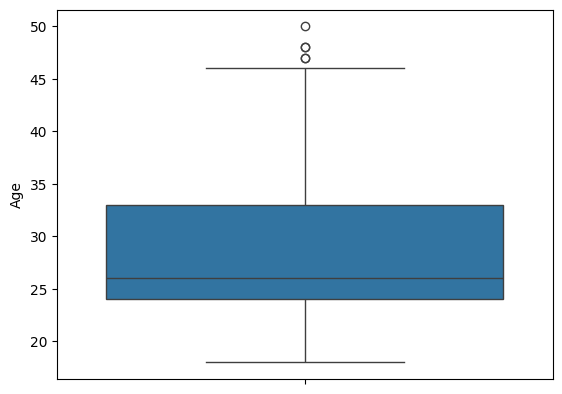

In [ ]:
sns.boxplot(df['Age'])

<Axes: ylabel='Education'>

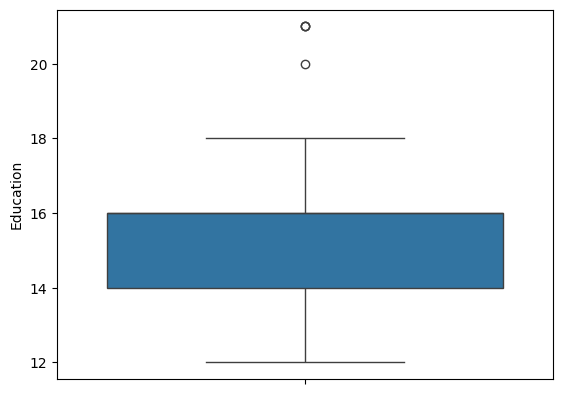

In [ ]:
sns.boxplot(df['Education'])

<Axes: ylabel='Usage'>

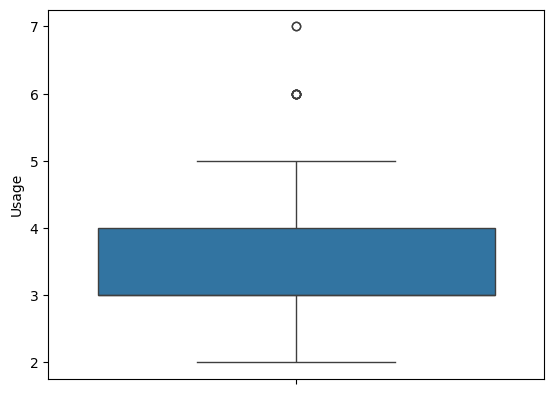

In [ ]:
sns.boxplot(df['Usage'])

<Axes: ylabel='Fitness'>

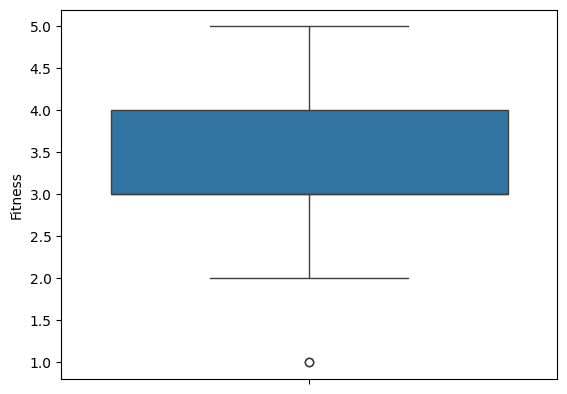

In [ ]:
sns.boxplot(df['Fitness'])

<Axes: ylabel='Income'>

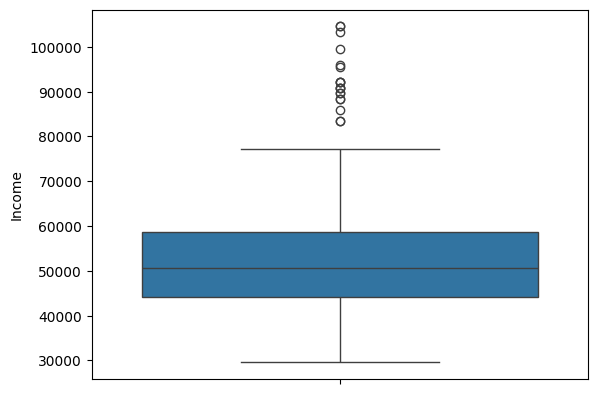

In [ ]:
sns.boxplot(df['Income'])

<Axes: ylabel='Miles'>

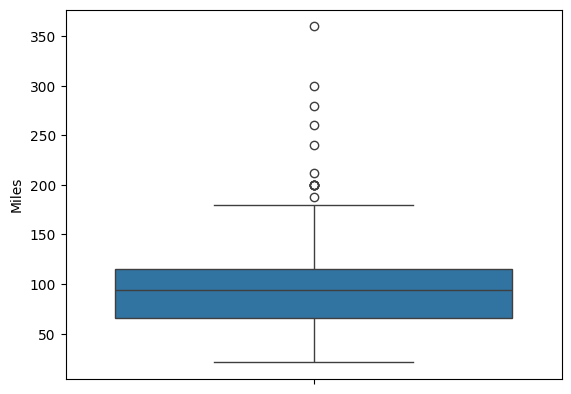

In [ ]:
sns.boxplot(df['Miles'])

# Visual Analysis

<Axes: xlabel='Product', ylabel='count'>

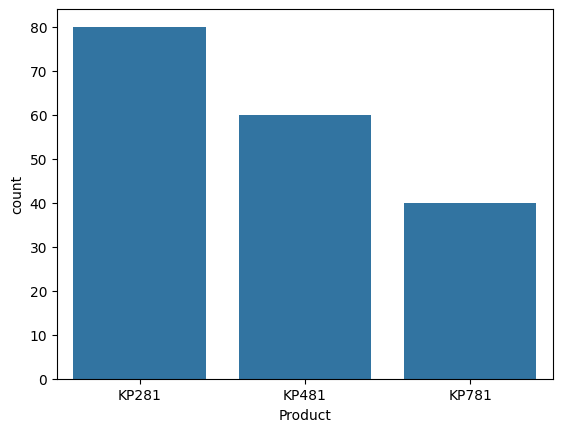

In [ ]:
sns.countplot(data=df, x='Product')

<Axes: xlabel='Gender', ylabel='count'>

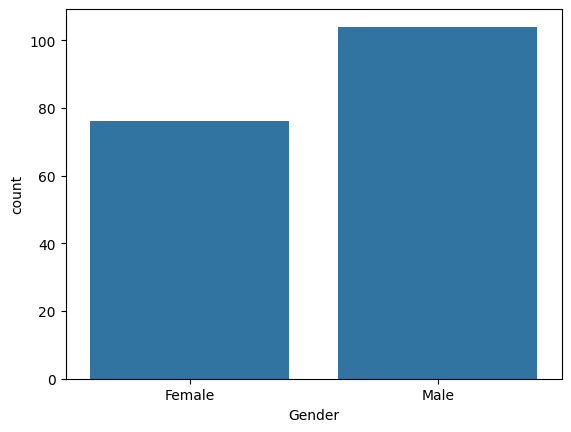

In [ ]:
sns.countplot(data=df, x='Gender')

<Axes: xlabel='MaritalStatus', ylabel='count'>

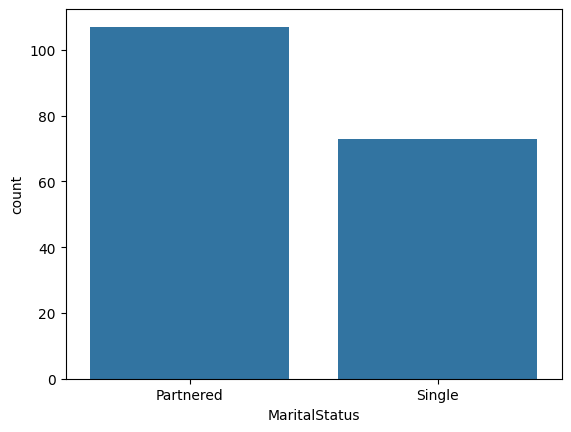

In [ ]:
sns.countplot(data=df, x='MaritalStatus')

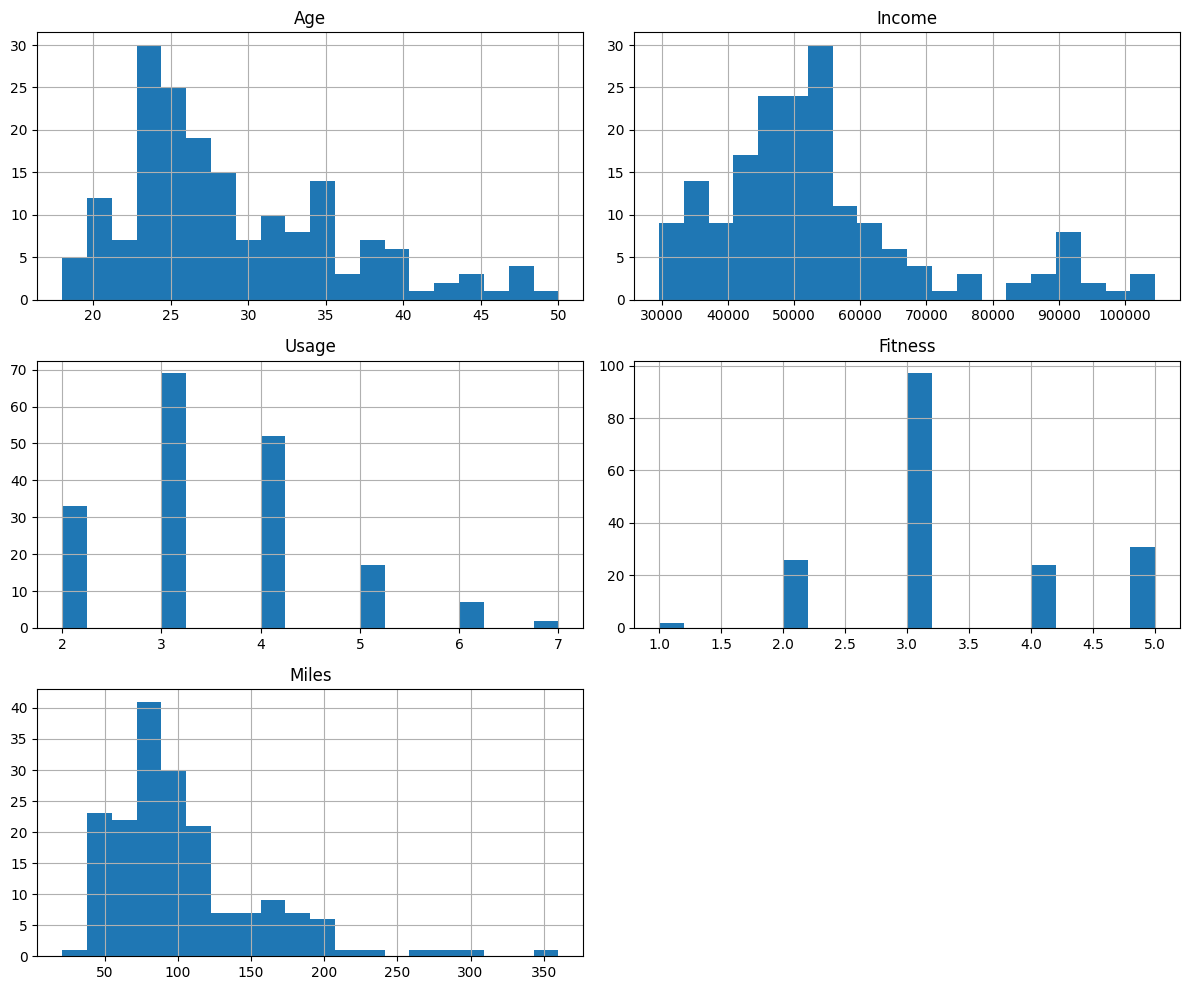

In [ ]:
df.hist(['Age', 'Income', 'Usage', 'Fitness', 'Miles'], figsize=(12, 10), bins=20)
plt.tight_layout()

<Axes: xlabel='Product', ylabel='Income'>

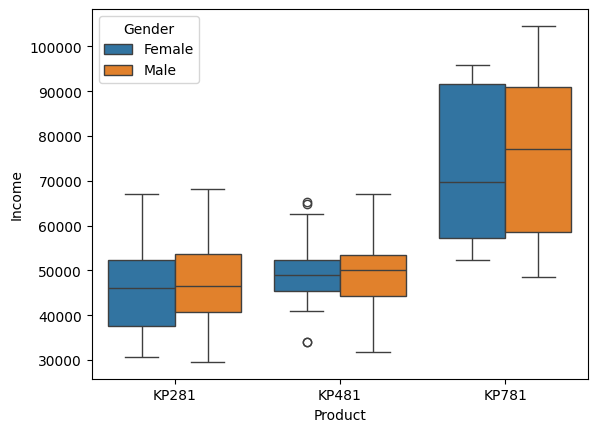

In [ ]:
sns.boxplot(data=df, x='Product', y='Income', hue='Gender')

<Axes: xlabel='Product', ylabel='Miles'>

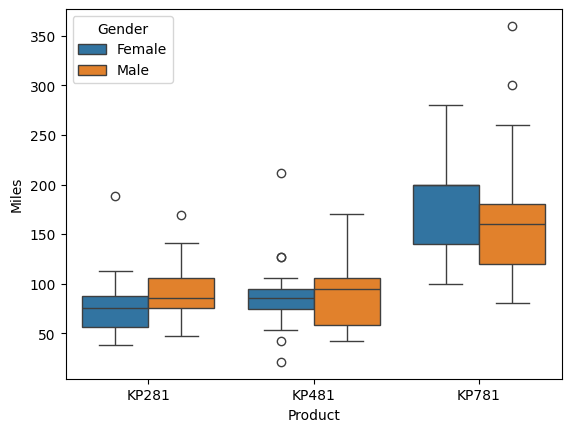

In [ ]:
sns.boxplot(data=df, x='Product', y='Miles', hue ='Gender')

<Axes: xlabel='Gender', ylabel='Income'>

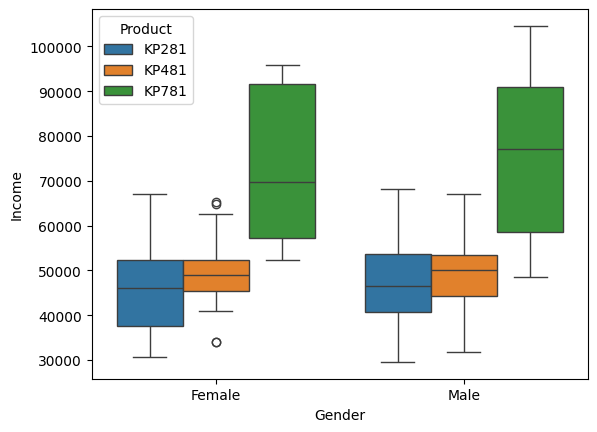

In [ ]:
sns.boxplot(data=df, x='Gender', y='Income', hue ='Product')

<Axes: xlabel='Gender', ylabel='Age'>

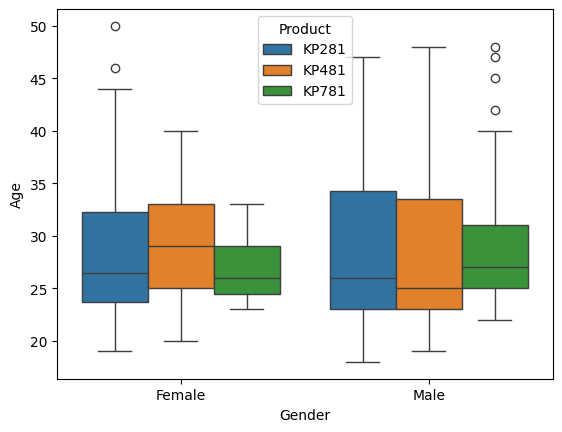

In [ ]:
sns.boxplot(data=df, x='Gender', y='Age', hue='Product')

<Axes: xlabel='Gender', ylabel='Miles'>

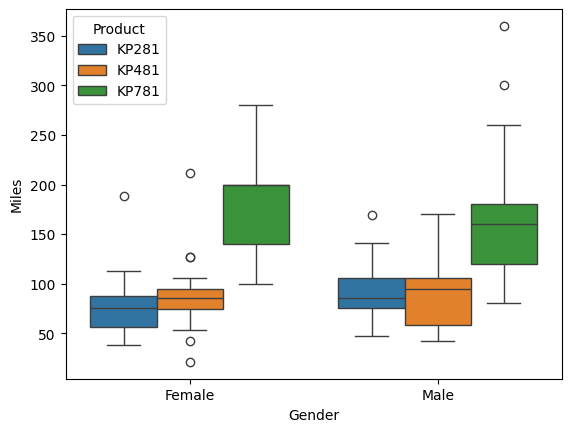

In [ ]:
sns.boxplot(data=df, x='Gender', y='Miles', hue ='Product')

#Relation between Gender and Product

<Axes: xlabel='Product', ylabel='count'>

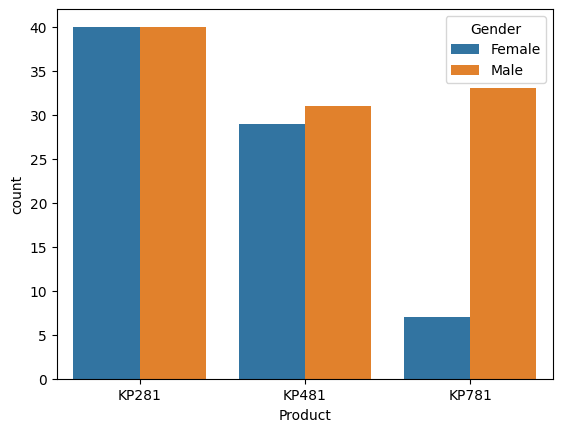

In [ ]:
sns.countplot(data=df, x='Product', hue='Gender', order=df['Product'].value_counts().index)

In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


#Relation between MaritalStatus and Product

<Axes: xlabel='Product', ylabel='count'>

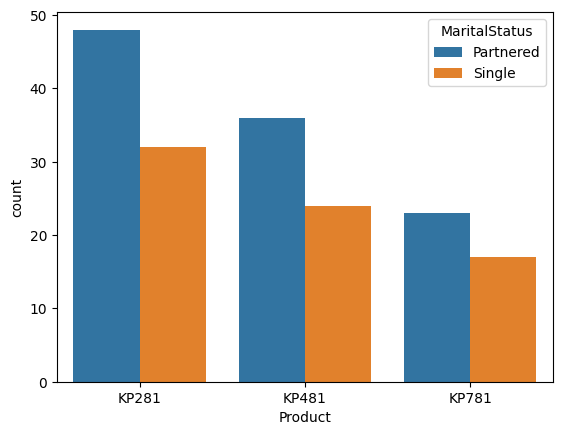

In [ ]:
sns.countplot(data=df, x='Product', hue='MaritalStatus')

In [ ]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['MaritalStatus'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


#Relation between Usage and Product

<Axes: xlabel='Product', ylabel='count'>

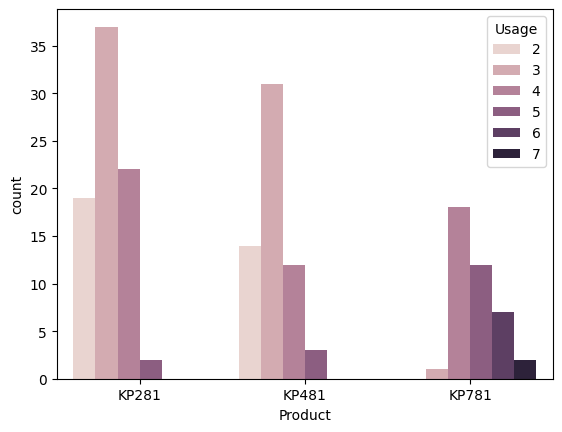

In [ ]:
sns.countplot(data=df, x='Product', hue='Usage', order=df['Product'].value_counts().index)

In [ ]:
pd.crosstab(index=df['Usage'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Usage,,,,
2,10.555556,7.777778,0.000000,18.333333
3,20.555556,17.222222,0.555556,38.333333
4,12.222222,6.666667,10.000000,28.888889
5,1.111111,1.666667,6.666667,9.444444
6,0.000000,0.000000,3.888889,3.888889
7,0.000000,0.000000,1.111111,1.111111
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['Usage'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


#Realation between Age and Product

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

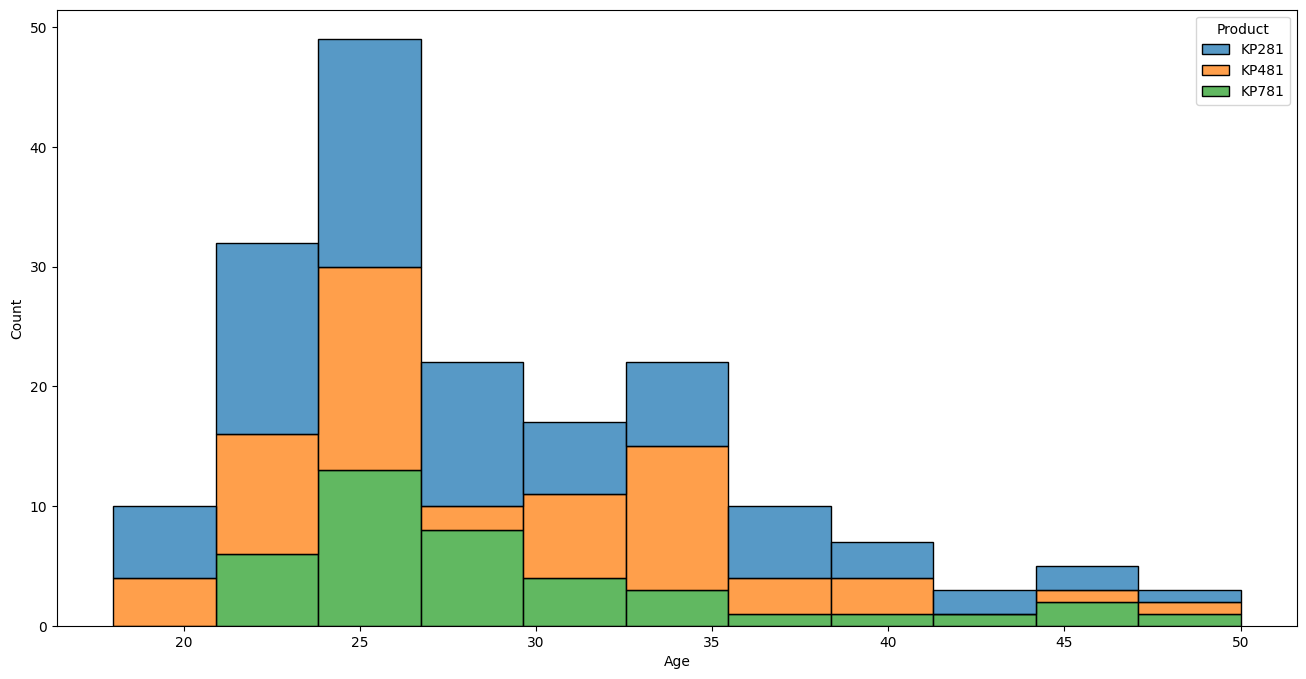

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(data=df, x='Age', hue='Product', multiple='stack')
plt

In [ ]:
pd.crosstab(index=df['Age'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Age,,,,
18,0.555556,0.000000,0.000000,0.555556
19,1.666667,0.555556,0.000000,2.222222
20,1.111111,1.666667,0.000000,2.777778
21,2.222222,1.666667,0.000000,3.888889
22,2.222222,0.000000,1.666667,3.888889
23,4.444444,3.888889,1.666667,10.000000
24,2.777778,1.666667,2.222222,6.666667
25,3.888889,6.111111,3.888889,13.888889
26,3.888889,1.666667,1.111111,6.666667


In [ ]:
pd.crosstab(index=df['Age'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Age,,,
18,1.000000,0.000000,0.000000
19,0.750000,0.250000,0.000000
20,0.400000,0.600000,0.000000
21,0.571429,0.428571,0.000000
22,0.571429,0.000000,0.428571
23,0.444444,0.388889,0.166667
24,0.416667,0.250000,0.333333
25,0.280000,0.440000,0.280000
26,0.583333,0.250000,0.166667


#Relation between Education and Product

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

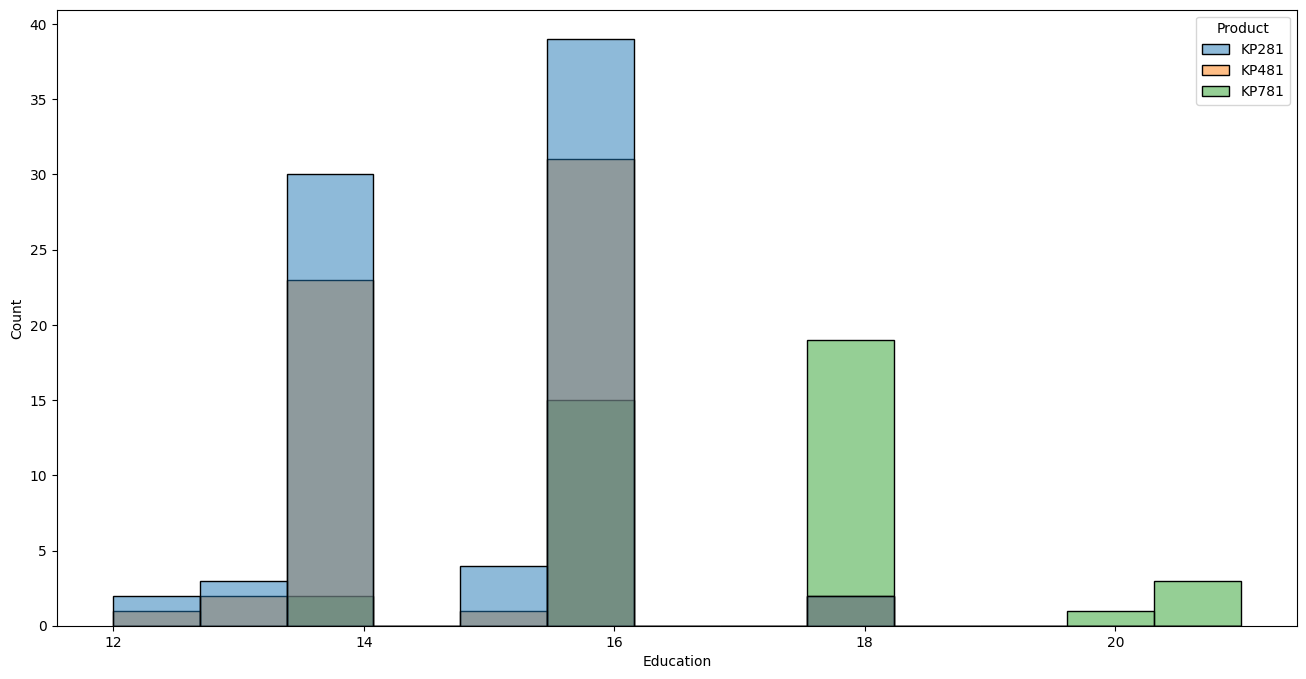

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(data=df, x='Education', hue='Product')
plt

In [ ]:
pd.crosstab(index=df['Education'], columns=df['Product'], margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
Education,,,,
12,1.111111,0.555556,0.000000,1.666667
13,1.666667,1.111111,0.000000,2.777778
14,16.666667,12.777778,1.111111,30.555556
15,2.222222,0.555556,0.000000,2.777778
16,21.666667,17.222222,8.333333,47.222222
18,1.111111,1.111111,10.555556,12.777778
20,0.000000,0.000000,0.555556,0.555556
21,0.000000,0.000000,1.666667,1.666667
All,44.444444,33.333333,22.222222,100.000000


In [ ]:
pd.crosstab(index=df['Education'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222


#Correlation

In [ ]:
df.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

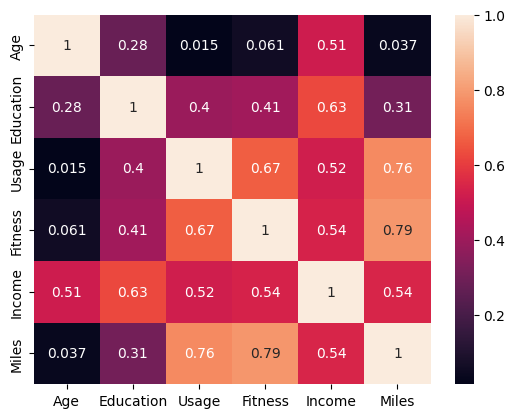

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Business Insights :-

**Age**: Most customers are in their 20s–30s. Older customers prefer the premium KP781.

**Income**: Higher-income customers go for KP781; KP281 is chosen by lower-income users.

**Usage & Miles**: More expensive treadmills are used more frequently and for longer distances.

**Fitness**: KP781 users rate their fitness highest; KP281 is popular with beginners.

**Gender**: Males prefer KP781; females lean toward KP281 and KP481.

**Product Popularity**: KP481 is most purchased (balanced features and price).



**Relationships:**

Income, fitness, and product choice are positively related.

Age and treadmill type also show a clear pattern.

# Recommendation :-

* Customers with high income and fitness levels prefer KP781 – position it as a premium product with athlete-grade features.

* Younger and single customers prefer KP281 – target students or young professionals.

* Males tend to prefer KP781 more than females – consider gender-focused marketing.

* Low-usage users prefer KP281 – bundle it with beginner fitness programs.



